In [1]:
import spacy
import string
import re
import pandas as pd
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nlp = spacy.load("en_core_web_sm")
from google.colab import files

# Upload the dataset_ml.xlsx file
uploaded = files.upload()

# Read the uploaded file into a DataFrame
df = pd.read_excel('/content/dataset_ml.xlsx')

Saving dataset_ml.xlsx to dataset_ml.xlsx


In [2]:
#get to know about dataset
print("Dataset Structure:")
print(df.head(5))

#display number of rows and columns
print("\nNumber of Rows and Columns:")
print(df.shape)

#display uniqueness
print("\nUnique Labels:")
print(df['labels'].unique())

Dataset Structure:
   Unnamed: 0                                             tweets   labels
0           0  ChatGPT: Optimizing Language Models for Dialog...  neutral
1           1  Try talking with ChatGPT, our new AI system wh...     good
2           2  ChatGPT: Optimizing Language Models for Dialog...  neutral
3           3  THRILLED to share that ChatGPT, our new model ...     good
4           4  As of 2 minutes ago, @OpenAI released their ne...      bad

Number of Rows and Columns:
(219294, 3)

Unique Labels:
['neutral' 'good' 'bad']


In [3]:
####finding missing values###
if df['tweets'].isna().any():
  df.dropna(subset=['tweets'], inplace = True)
  print("dataset after handling missing values")
  print(df)
else:
  print("no missing values found")
  print(df)

dataset after handling missing values
        Unnamed: 0                                             tweets   labels
0                0  ChatGPT: Optimizing Language Models for Dialog...  neutral
1                1  Try talking with ChatGPT, our new AI system wh...     good
2                2  ChatGPT: Optimizing Language Models for Dialog...  neutral
3                3  THRILLED to share that ChatGPT, our new model ...     good
4                4  As of 2 minutes ago, @OpenAI released their ne...      bad
...            ...                                                ...      ...
219289      219289  Other Software Projects Are Now Trying to Repl...      bad
219290      219290  I asked #ChatGPT to write a #NYE Joke for SEOs...     good
219291      219291  chatgpt is being disassembled until it can onl...      bad
219292      219292  2023 predictions by #chatGPT. Nothing really s...      bad
219293      219293   From ChatGPT, neat stuff https://t.co/qjjUF2Z2m0  neutral

[219290 rows 

In [4]:
###converting to lowercase
df['changed_text'] = df['tweets'].str.lower()
df[['tweets','changed_text']]


,tweets,changed_text
0,ChatGPT: Optimizing Language Models for Dialog...,chatgpt: optimizing language models for dialog...
1,"Try talking with ChatGPT, our new AI system wh...","try talking with chatgpt, our new ai system wh..."
2,ChatGPT: Optimizing Language Models for Dialog...,chatgpt: optimizing language models for dialog...
3,"THRILLED to share that ChatGPT, our new model ...","thrilled to share that chatgpt, our new model ..."
4,"As of 2 minutes ago, @OpenAI released their ne...","as of 2 minutes ago, @openai released their ne..."
...,...,...
219289,Other Software Projects Are Now Trying to Repl...,other software projects are now trying to repl...
219290,I asked #ChatGPT to write a #NYE Joke for SEOs...,i asked #chatgpt to write a #nye joke for seos...
219291,chatgpt is being disassembled until it can onl...,chatgpt is being disassembled until it can onl...
219292,2023 predictions by #chatGPT. Nothing really s...,2023 predictions by #chatgpt. nothing really s...


In [5]:
#remove url's
def remove_urls(textt):
    pattern = r'http[s]?://\S+|www\.\S+'
    textt = re.sub(pattern, ' ', textt)
    return textt

df['changed_text'] = df['changed_text'].str.lower().apply(remove_urls)
df[['tweets','changed_text']]

,tweets,changed_text
0,ChatGPT: Optimizing Language Models for Dialog...,chatgpt: optimizing language models for dialog...
1,"Try talking with ChatGPT, our new AI system wh...","try talking with chatgpt, our new ai system wh..."
2,ChatGPT: Optimizing Language Models for Dialog...,chatgpt: optimizing language models for dialog...
3,"THRILLED to share that ChatGPT, our new model ...","thrilled to share that chatgpt, our new model ..."
4,"As of 2 minutes ago, @OpenAI released their ne...","as of 2 minutes ago, @openai released their ne..."
...,...,...
219289,Other Software Projects Are Now Trying to Repl...,other software projects are now trying to repl...
219290,I asked #ChatGPT to write a #NYE Joke for SEOs...,i asked #chatgpt to write a #nye joke for seos...
219291,chatgpt is being disassembled until it can onl...,chatgpt is being disassembled until it can onl...
219292,2023 predictions by #chatGPT. Nothing really s...,2023 predictions by #chatgpt. nothing really s...


In [6]:
def remove_user_handles(textt):
    handle_pattern = r'@[\w]+'
    textt = re.sub(handle_pattern, ' ', textt)
    return textt

df['changed_text'] = df['changed_text'].str.lower().apply(remove_user_handles)
df[['tweets','changed_text']]

,tweets,changed_text
0,ChatGPT: Optimizing Language Models for Dialog...,chatgpt: optimizing language models for dialog...
1,"Try talking with ChatGPT, our new AI system wh...","try talking with chatgpt, our new ai system wh..."
2,ChatGPT: Optimizing Language Models for Dialog...,chatgpt: optimizing language models for dialog...
3,"THRILLED to share that ChatGPT, our new model ...","thrilled to share that chatgpt, our new model ..."
4,"As of 2 minutes ago, @OpenAI released their ne...","as of 2 minutes ago, released their new chat..."
...,...,...
219289,Other Software Projects Are Now Trying to Repl...,other software projects are now trying to repl...
219290,I asked #ChatGPT to write a #NYE Joke for SEOs...,i asked #chatgpt to write a #nye joke for seos...
219291,chatgpt is being disassembled until it can onl...,chatgpt is being disassembled until it can onl...
219292,2023 predictions by #chatGPT. Nothing really s...,2023 predictions by #chatgpt. nothing really s...


In [7]:
def remove_hashtags(textt):
    return re.sub(r'#\w+', '', textt)
df['changed_text'] = df['changed_text'].apply(remove_hashtags)
df[['tweets','changed_text']]


,tweets,changed_text
0,ChatGPT: Optimizing Language Models for Dialog...,chatgpt: optimizing language models for dialog...
1,"Try talking with ChatGPT, our new AI system wh...","try talking with chatgpt, our new ai system wh..."
2,ChatGPT: Optimizing Language Models for Dialog...,chatgpt: optimizing language models for dialog...
3,"THRILLED to share that ChatGPT, our new model ...","thrilled to share that chatgpt, our new model ..."
4,"As of 2 minutes ago, @OpenAI released their ne...","as of 2 minutes ago, released their new chat..."
...,...,...
219289,Other Software Projects Are Now Trying to Repl...,other software projects are now trying to repl...
219290,I asked #ChatGPT to write a #NYE Joke for SEOs...,i asked to write a joke for seos and it deli...
219291,chatgpt is being disassembled until it can onl...,chatgpt is being disassembled until it can onl...
219292,2023 predictions by #chatGPT. Nothing really s...,"2023 predictions by . nothing really specific,..."


In [8]:
def remove_punctuation(textt):
    return re.sub(r'[^\w\s]', '', textt)
df['changed_text'] = df['changed_text'].apply(remove_punctuation)
df[['tweets','changed_text']]


,tweets,changed_text
0,ChatGPT: Optimizing Language Models for Dialog...,chatgpt optimizing language models for dialogu...
1,"Try talking with ChatGPT, our new AI system wh...",try talking with chatgpt our new ai system whi...
2,ChatGPT: Optimizing Language Models for Dialog...,chatgpt optimizing language models for dialogu...
3,"THRILLED to share that ChatGPT, our new model ...",thrilled to share that chatgpt our new model o...
4,"As of 2 minutes ago, @OpenAI released their ne...",as of 2 minutes ago released their new chatg...
...,...,...
219289,Other Software Projects Are Now Trying to Repl...,other software projects are now trying to repl...
219290,I asked #ChatGPT to write a #NYE Joke for SEOs...,i asked to write a joke for seos and it deli...
219291,chatgpt is being disassembled until it can onl...,chatgpt is being disassembled until it can onl...
219292,2023 predictions by #chatGPT. Nothing really s...,2023 predictions by nothing really specific j...


In [9]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
#remove stopwords
def remove_stopword(text):
    words = text.split()
    filter_words = [word for word in words if word not in stop_words]
    return ' '.join(filter_words)

def text_to_word_list(text):
    return text.split()

df['changed_text'] = df['changed_text'].apply(remove_stopword)
df['tweet_list'] = df['changed_text'].apply(text_to_word_list)

print(df[['tweet_list','changed_text']])

#to check if stopwords are removed
print(df['changed_text'].iloc[3])
print(df['tweet_list'].iloc[3])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                               tweet_list  \
0       [chatgpt, optimizing, language, models, dialogue]   
1       [try, talking, chatgpt, new, ai, system, optim...   
2       [chatgpt, optimizing, language, models, dialog...   
3       [thrilled, share, chatgpt, new, model, optimiz...   
4       [2, minutes, ago, released, new, chatgpt, nnan...   
...                                                   ...   
219289   [software, projects, trying, replicate, chatgpt]   
219290  [asked, write, joke, seos, delivered, nnwhy, s...   
219291                 [chatgpt, disassembled, dissemble]   
219292  [2023, predictions, nothing, really, specific,...   
219293                             [chatgpt, neat, stuff]   

                                             changed_text  
0             chatgpt optimizing language models dialogue  
1       try talking chatgpt new ai system optimized di...  
2       chatgpt optimizing language models dialogue nn...  
3       thrilled share chat

In [10]:
#remove extra white spaces
def remove_extra_whitespace(text):
    cleaned_text = re.sub(r'\s+', ' ', text).strip()
    return cleaned_text

df['changed_text'] = df['changed_text'].apply(remove_extra_whitespace)
df[['tweets','changed_text']].head(40)

,tweets,changed_text
0,ChatGPT: Optimizing Language Models for Dialog...,chatgpt optimizing language models dialogue
1,"Try talking with ChatGPT, our new AI system wh...",try talking chatgpt new ai system optimized di...
2,ChatGPT: Optimizing Language Models for Dialog...,chatgpt optimizing language models dialogue nn...
3,"THRILLED to share that ChatGPT, our new model ...",thrilled share chatgpt new model optimized dia...
4,"As of 2 minutes ago, @OpenAI released their ne...",2 minutes ago released new chatgpt nnand use r...
5,"Just launched ChatGPT, our new AI system which...",launched chatgpt new ai system optimized dialogue
6,"As of 2 minutes ago, @OpenAI released their ne...",2 minutes ago released new chatgpt nnand use r...
7,ChatGPT coming out strong refusing to help me ...,chatgpt coming strong refusing help stalk some...
8,#0penAl just deployed a thing I've been helpin...,deployed thing ive helping build last couple m...
9,Research preview of our newest model: ChatGPT\...,research preview newest model chatgptnnwere tr...


In [11]:
def remove_ascii(text):
    cleaned_text = re.sub(r'[^\x00-\x7F]+', '', text)
    return cleaned_text
df['changed_text'] = df['changed_text'].apply(remove_ascii)
df[['tweets','changed_text']].head(70)

,tweets,changed_text
0,ChatGPT: Optimizing Language Models for Dialog...,chatgpt optimizing language models dialogue
1,"Try talking with ChatGPT, our new AI system wh...",try talking chatgpt new ai system optimized di...
2,ChatGPT: Optimizing Language Models for Dialog...,chatgpt optimizing language models dialogue nn...
3,"THRILLED to share that ChatGPT, our new model ...",thrilled share chatgpt new model optimized dia...
4,"As of 2 minutes ago, @OpenAI released their ne...",2 minutes ago released new chatgpt nnand use r...
...,...,...
65,I've managed to secretly contact the bot behin...,ive managed secretly contact bot behind openai...
66,ChatGPT: Optimizing Language Models for Dialog...,chatgpt optimizing language models dialogue n nn
67,OpenAI ChatGPT: Optimizing Language Models for...,openai chatgpt optimizing language models dial...
68,ChatGPT setting boundaries with me ðŸ¥²\n\nhtt...,chatgpt setting boundaries nn


In [12]:
df_copy = df.copy()
#count the total number of tweets before removing duplicates
total_tweets_before = len(df)
df['changed_text'] = df['changed_text'].drop_duplicates(keep='first')

#count the total number of tweets after removing duplicates
total_tweets_after = len(df)

#calculate the number of duplicates removed
duplicates_removed = total_tweets_before - total_tweets_after

print(f"Total tweets before removing duplicates: {total_tweets_before}")
print(f"Total tweets after removing duplicates: {total_tweets_after}")
print(f"Duplicates removed: {duplicates_removed}")

removed_indices = df_copy.index.difference(df.index)

print("Indices of Removed Tweets:")
print(removed_indices)

df[['tweets', 'changed_text']].head(20)

Total tweets before removing duplicates: 219290
Total tweets after removing duplicates: 219290
Duplicates removed: 0
Indices of Removed Tweets:
Int64Index([], dtype='int64')


,tweets,changed_text
0,ChatGPT: Optimizing Language Models for Dialog...,chatgpt optimizing language models dialogue
1,"Try talking with ChatGPT, our new AI system wh...",try talking chatgpt new ai system optimized di...
2,ChatGPT: Optimizing Language Models for Dialog...,chatgpt optimizing language models dialogue nn...
3,"THRILLED to share that ChatGPT, our new model ...",thrilled share chatgpt new model optimized dia...
4,"As of 2 minutes ago, @OpenAI released their ne...",2 minutes ago released new chatgpt nnand use r...
5,"Just launched ChatGPT, our new AI system which...",launched chatgpt new ai system optimized dialogue
6,"As of 2 minutes ago, @OpenAI released their ne...",2 minutes ago released new chatgpt nnand use r...
7,ChatGPT coming out strong refusing to help me ...,chatgpt coming strong refusing help stalk some...
8,#0penAl just deployed a thing I've been helpin...,deployed thing ive helping build last couple m...
9,Research preview of our newest model: ChatGPT\...,research preview newest model chatgptnnwere tr...


In [13]:
df = df.dropna()

In [14]:
df.head(20)

,Unnamed: 0,tweets,labels,changed_text,tweet_list
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral,chatgpt optimizing language models dialogue,"[chatgpt, optimizing, language, models, dialogue]"
1,1,"Try talking with ChatGPT, our new AI system wh...",good,try talking chatgpt new ai system optimized di...,"[try, talking, chatgpt, new, ai, system, optim..."
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral,chatgpt optimizing language models dialogue nn...,"[chatgpt, optimizing, language, models, dialog..."
3,3,"THRILLED to share that ChatGPT, our new model ...",good,thrilled share chatgpt new model optimized dia...,"[thrilled, share, chatgpt, new, model, optimiz..."
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad,2 minutes ago released new chatgpt nnand use r...,"[2, minutes, ago, released, new, chatgpt, nnan..."
5,5,"Just launched ChatGPT, our new AI system which...",good,launched chatgpt new ai system optimized dialogue,"[launched, chatgpt, new, ai, system, optimized..."
6,6,"As of 2 minutes ago, @OpenAI released their ne...",bad,2 minutes ago released new chatgpt nnand use r...,"[2, minutes, ago, released, new, chatgpt, nnan..."
7,7,ChatGPT coming out strong refusing to help me ...,good,chatgpt coming strong refusing help stalk some...,"[chatgpt, coming, strong, refusing, help, stal..."
8,8,#0penAl just deployed a thing I've been helpin...,good,deployed thing ive helping build last couple m...,"[deployed, thing, ive, helping, build, last, c..."
9,9,Research preview of our newest model: ChatGPT\...,neutral,research preview newest model chatgptnnwere tr...,"[research, preview, newest, model, chatgptnnwe..."


In [15]:
df['labels'].value_counts()

bad        90103
good       52521
neutral    49044
Name: labels, dtype: int64

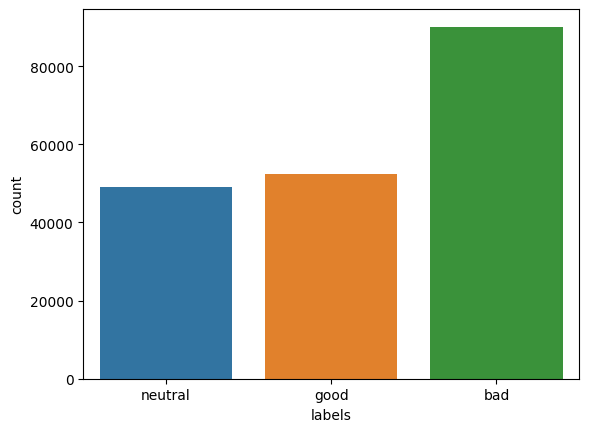

In [16]:
sns.countplot(data=df, x='labels')
plt.show()

In [17]:
good_tweets_list=df[df['labels'] == 'good']['changed_text'].tolist()
neutral_tweets_list= df[df['labels'] == 'neutral']['changed_text'].tolist()
bad_tweets_list = df[df['labels'] == 'bad']['changed_text'].tolist()

In [18]:
good_tweets_list

['try talking chatgpt new ai system optimized dialogue feedback help us improve',
 'thrilled share chatgpt new model optimized dialog public free accessible everyone',
 'launched chatgpt new ai system optimized dialogue',
 'chatgpt coming strong refusing help stalk someone agreeing providing someone waldo',
 'deployed thing ive helping build last couple months chatbot based gpt 3 im really excited share vln',
 'launched chatgpt conversational ai system listens learns challenges nnhelp us make better trying',
 'chatgpt research preview today excited get feedback especially help understand contextualize model risks see details thread chatgpt feedback contest',
 'folk released chatgpt looks like key innovation retains information previous prompts nnat last start constructing ai wife nn',
 'chatgpt research preview nnit optimized dialogue ready conversation dont shygive try help us make betternn',
 'openais new chatgpt honest ',
 'asked chatgpt basics gave truly educational answer learning

In [19]:
neutral_tweets_list

['chatgpt optimizing language models dialogue',
 'chatgpt optimizing language models dialogue nntrending aiml article identified amp digested via granola machinedriven rss bot ramsey elbasheer',
 'research preview newest model chatgptnnwere trying something new preview free immediately available everyone waitlist',
 'openai chatgpt optimizing language models dialoguenl',
 'openai announced chatgpt model optimized dialogue',
 'openai chatgpt optimizing language models dialogue n2',
 'chatgpt optimizing language models dialogue via',
 'asked chatgpt new ai system optimized dialogue teach seo minutennthe result',
 'openai chatgpt optimizing language models dialogue',
 'clear chatgpt trained avoid prescriptive answers instead counseling human reaching conclusionnnpresent trolly problem helps find framework think itnnask direct openly refuses',
 'openai chatgpt optimizing language models dialogue comments',
 'openai chatgpt optimizing language models dialoguenlink',
 'chatgpt optimizing lan

In [20]:
bad_tweets_list

['2 minutes ago released new chatgpt nnand use right ',
 '2 minutes ago released new chatgpt nnand use right n n',
 'god damn stop announcing things busy',
 'models set become search engines future atm still struggle veracity based nn',
 'google donenncompare quality responses chatgpt',
 'chatgpt vs riddles',
 'openais chatgpt available test give try hardest questions known humans',
 'asked chatgpt write telugu song cereal mixed milk chicken masala ',
 'spent bunch time discussing different organizational models new chatgpt incredible',
 'chatgpt thwarts many attempts malicious javascript injections',
 'damn openai tried implications assistant like chatgpt disposal revolutionary',
 'chatgpt english essay writing going go toss',
 'give try ntill answered well except onenn',
 'chatgpt',
 ' new mirror article droppednchatgpt web3 0xa6ddn',
 'chatgpt setting boundaries nn',
 'capabilities chatgpt still kind seems rlhfd basin boringness seems hard avoid organization even least bit riskavers

In [21]:
good_tweets_words = []
for line in good_tweets_list:
    line_split = line.split()
    good_tweets_words.extend(line_split)

In [22]:
good_tweets_words

['try',
 'talking',
 'chatgpt',
 'new',
 'ai',
 'system',
 'optimized',
 'dialogue',
 'feedback',
 'help',
 'us',
 'improve',
 'thrilled',
 'share',
 'chatgpt',
 'new',
 'model',
 'optimized',
 'dialog',
 'public',
 'free',
 'accessible',
 'everyone',
 'launched',
 'chatgpt',
 'new',
 'ai',
 'system',
 'optimized',
 'dialogue',
 'chatgpt',
 'coming',
 'strong',
 'refusing',
 'help',
 'stalk',
 'someone',
 'agreeing',
 'providing',
 'someone',
 'waldo',
 'deployed',
 'thing',
 'ive',
 'helping',
 'build',
 'last',
 'couple',
 'months',
 'chatbot',
 'based',
 'gpt',
 '3',
 'im',
 'really',
 'excited',
 'share',
 'vln',
 'launched',
 'chatgpt',
 'conversational',
 'ai',
 'system',
 'listens',
 'learns',
 'challenges',
 'nnhelp',
 'us',
 'make',
 'better',
 'trying',
 'chatgpt',
 'research',
 'preview',
 'today',
 'excited',
 'get',
 'feedback',
 'especially',
 'help',
 'understand',
 'contextualize',
 'model',
 'risks',
 'see',
 'details',
 'thread',
 'chatgpt',
 'feedback',
 'contest',
 

In [23]:
bad_tweets_words = []
for line in bad_tweets_list:
    line_split = line.split()
    bad_tweets_words.extend(line_split)

In [24]:
bad_tweets_words

['2',
 'minutes',
 'ago',
 'released',
 'new',
 'chatgpt',
 'nnand',
 'use',
 'right',
 '2',
 'minutes',
 'ago',
 'released',
 'new',
 'chatgpt',
 'nnand',
 'use',
 'right',
 'n',
 'n',
 'god',
 'damn',
 'stop',
 'announcing',
 'things',
 'busy',
 'models',
 'set',
 'become',
 'search',
 'engines',
 'future',
 'atm',
 'still',
 'struggle',
 'veracity',
 'based',
 'nn',
 'google',
 'donenncompare',
 'quality',
 'responses',
 'chatgpt',
 'chatgpt',
 'vs',
 'riddles',
 'openais',
 'chatgpt',
 'available',
 'test',
 'give',
 'try',
 'hardest',
 'questions',
 'known',
 'humans',
 'asked',
 'chatgpt',
 'write',
 'telugu',
 'song',
 'cereal',
 'mixed',
 'milk',
 'chicken',
 'masala',
 'spent',
 'bunch',
 'time',
 'discussing',
 'different',
 'organizational',
 'models',
 'new',
 'chatgpt',
 'incredible',
 'chatgpt',
 'thwarts',
 'many',
 'attempts',
 'malicious',
 'javascript',
 'injections',
 'damn',
 'openai',
 'tried',
 'implications',
 'assistant',
 'like',
 'chatgpt',
 'disposal',
 'revo

In [25]:
neutral_tweets_words = []
for line in neutral_tweets_list:
    line_split = line.split()
    neutral_tweets_words.extend(line_split)

In [26]:
neutral_tweets_words

['chatgpt',
 'optimizing',
 'language',
 'models',
 'dialogue',
 'chatgpt',
 'optimizing',
 'language',
 'models',
 'dialogue',
 'nntrending',
 'aiml',
 'article',
 'identified',
 'amp',
 'digested',
 'via',
 'granola',
 'machinedriven',
 'rss',
 'bot',
 'ramsey',
 'elbasheer',
 'research',
 'preview',
 'newest',
 'model',
 'chatgptnnwere',
 'trying',
 'something',
 'new',
 'preview',
 'free',
 'immediately',
 'available',
 'everyone',
 'waitlist',
 'openai',
 'chatgpt',
 'optimizing',
 'language',
 'models',
 'dialoguenl',
 'openai',
 'announced',
 'chatgpt',
 'model',
 'optimized',
 'dialogue',
 'openai',
 'chatgpt',
 'optimizing',
 'language',
 'models',
 'dialogue',
 'n2',
 'chatgpt',
 'optimizing',
 'language',
 'models',
 'dialogue',
 'via',
 'asked',
 'chatgpt',
 'new',
 'ai',
 'system',
 'optimized',
 'dialogue',
 'teach',
 'seo',
 'minutennthe',
 'result',
 'openai',
 'chatgpt',
 'optimizing',
 'language',
 'models',
 'dialogue',
 'clear',
 'chatgpt',
 'trained',
 'avoid',
 'p

In [27]:
from textblob import TextBlob

def calculate_overall_sentiment(tweet_words):
    typo = ' '.join(tweet_words)
    analysis = TextBlob(typo)
    senti = analysis.sentiment.polarity
    if senti > 0:
        return senti, 'Positive'
    elif senti < 0:
        return senti, 'Negative'
    else:
        return senti, 'Neutral'

good_sentiment, good_category = calculate_overall_sentiment(good_tweets_words)
bad_sentiment, bad_category = calculate_overall_sentiment(bad_tweets_words)
neutral_sentiment, neutral_category = calculate_overall_sentiment(neutral_tweets_words)

print("Sentiment for 'good' tweets:")
print(f"Average Sentiment Score: {good_sentiment}")
print(f"Sentiment Category: {good_category}\n")

print("Sentiment for 'neutral' tweets:")
print(f"Average Sentiment Score: {neutral_sentiment}")
print(f"Sentiment Category: {neutral_category}")

print("Sentiment for 'bad' tweets:")
print(f"Average Sentiment Score: {bad_sentiment}")
print(f"Sentiment Category: {bad_category}\n")




Sentiment for 'good' tweets:
Average Sentiment Score: 0.2666691438546871
Sentiment Category: Positive

Sentiment for 'neutral' tweets:
Average Sentiment Score: 0.14196473403285245
Sentiment Category: Positive
Sentiment for 'bad' tweets:
Average Sentiment Score: -0.011611122113383113
Sentiment Category: Negative



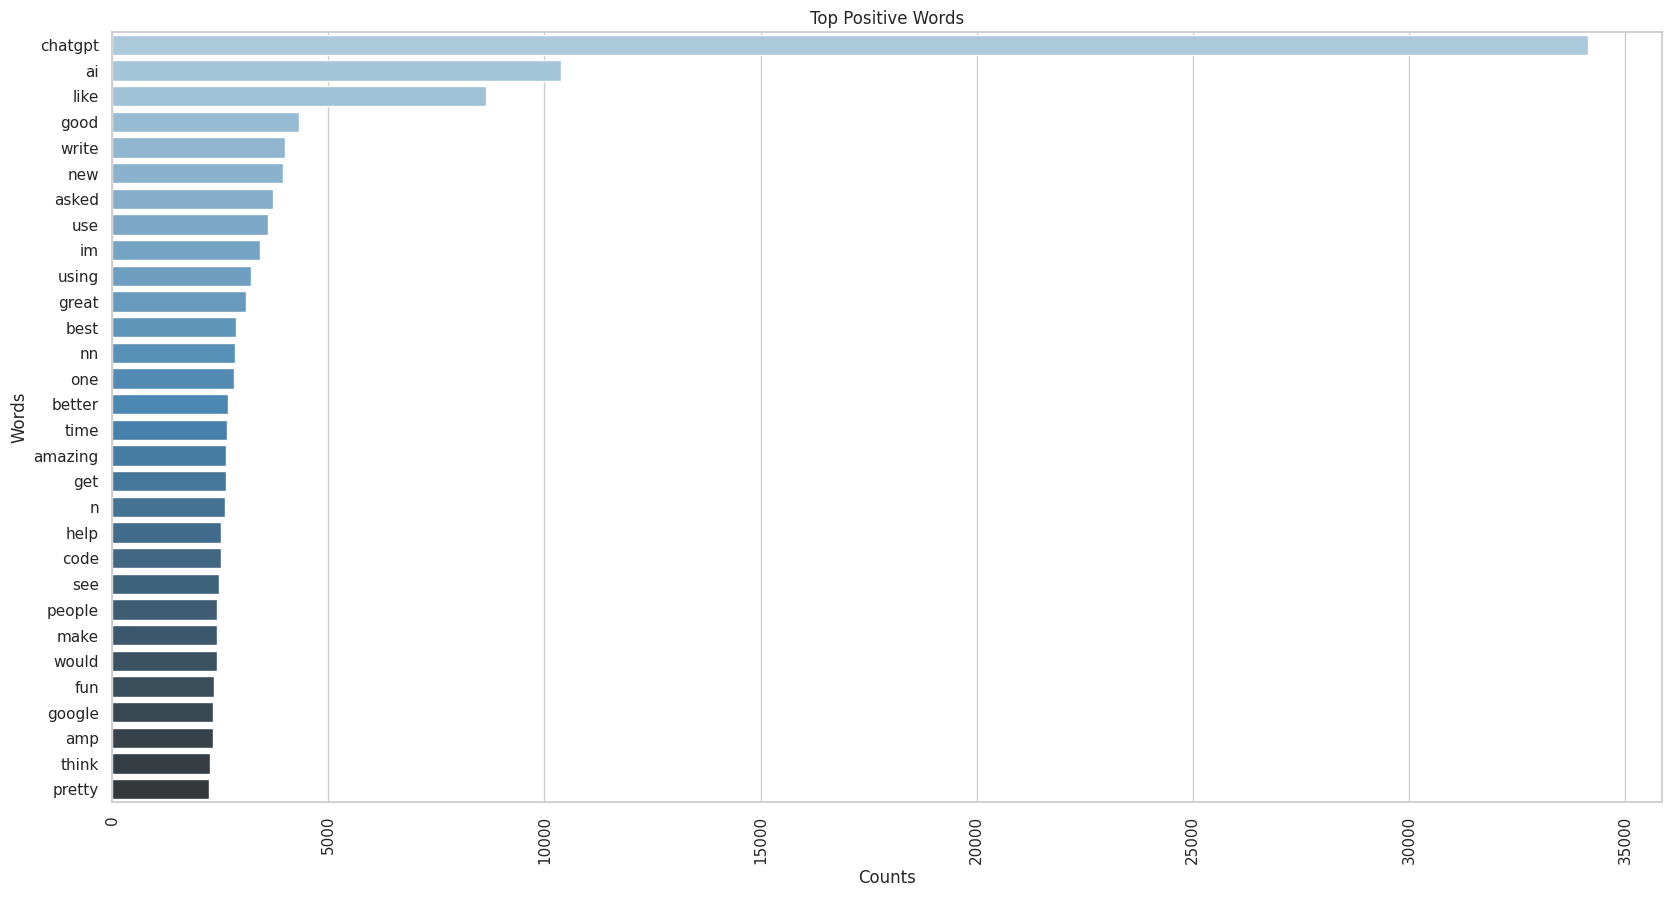

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter

def plot_bar(words, title, color):
    # Count word frequencies
    word_freq = Counter(words)
    top_words_num = 30
    top_words = [word for word, count in word_freq.most_common(top_words_num)]
    top_counts = [count for word, count in word_freq.most_common(top_words_num)]
    data = pd.DataFrame({
        'Words': top_words,
        'Counts': top_counts
    })
    # Set up the Seaborn plot
    plt.figure(figsize=(20, 10))
    sns.set(style="whitegrid")
    sns.barplot(x="Counts", y="Words", data=data, palette=color)
    plt.title(title)
    # Adjust the rotation of the y-axis labels
    plt.xticks(rotation=90)
    plt.show()
colors = ['Blues_d', 'Reds_d', 'Greens_d']
plot_bar(good_tweets_words, "Top Positive Words", colors[0])



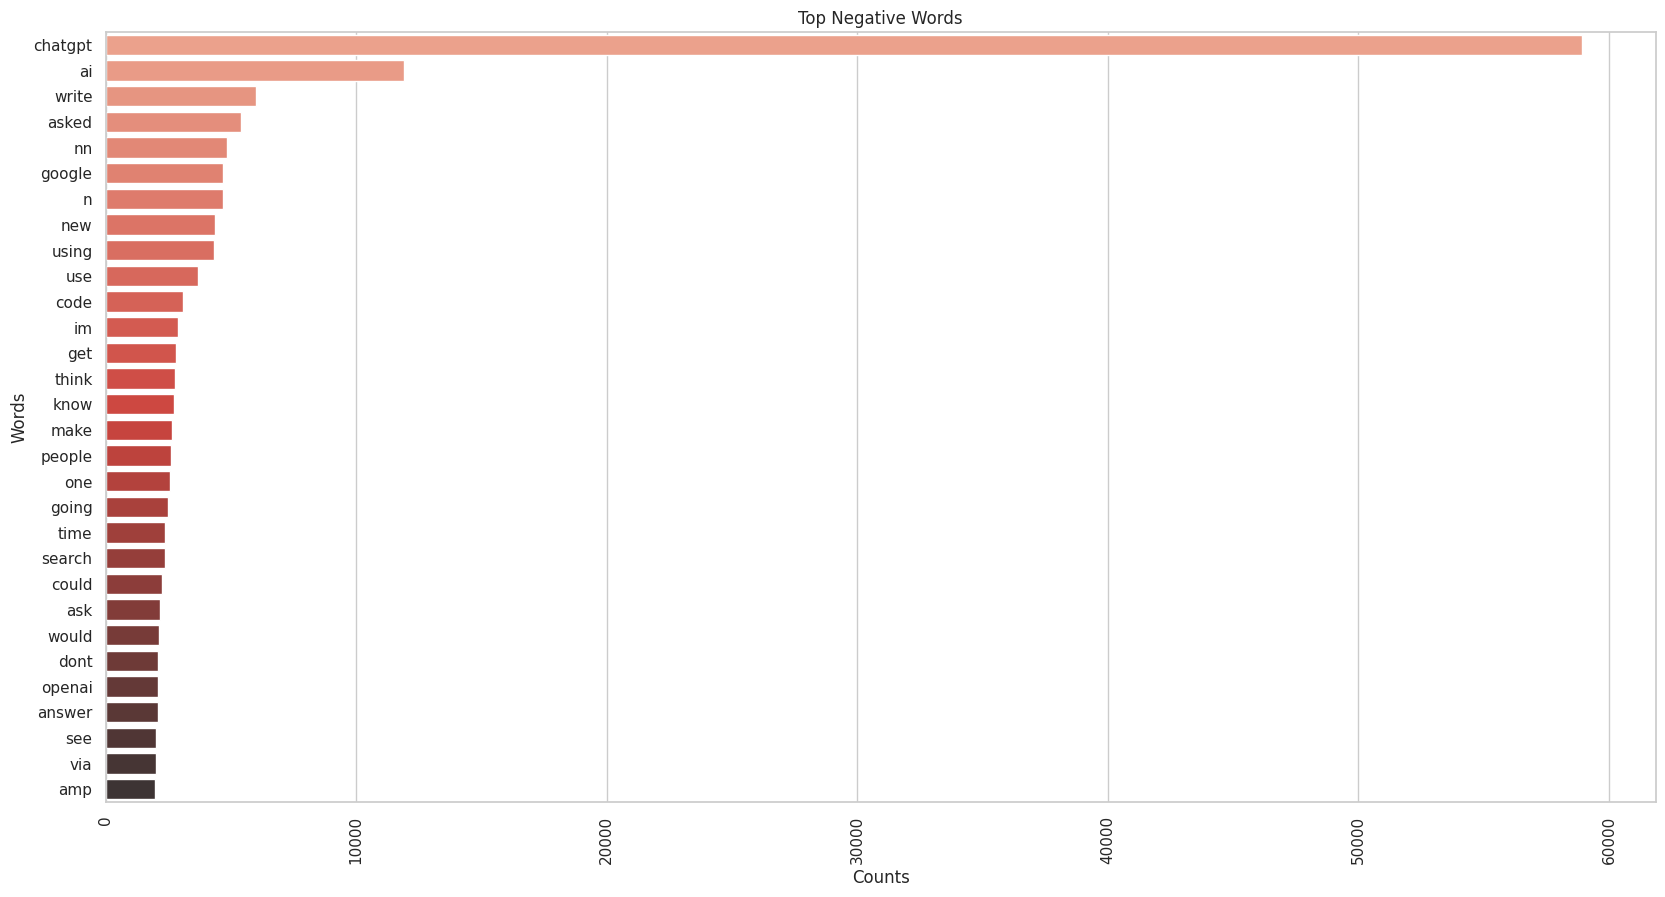

In [29]:
plot_bar(bad_tweets_words, "Top Negative Words", colors[1])


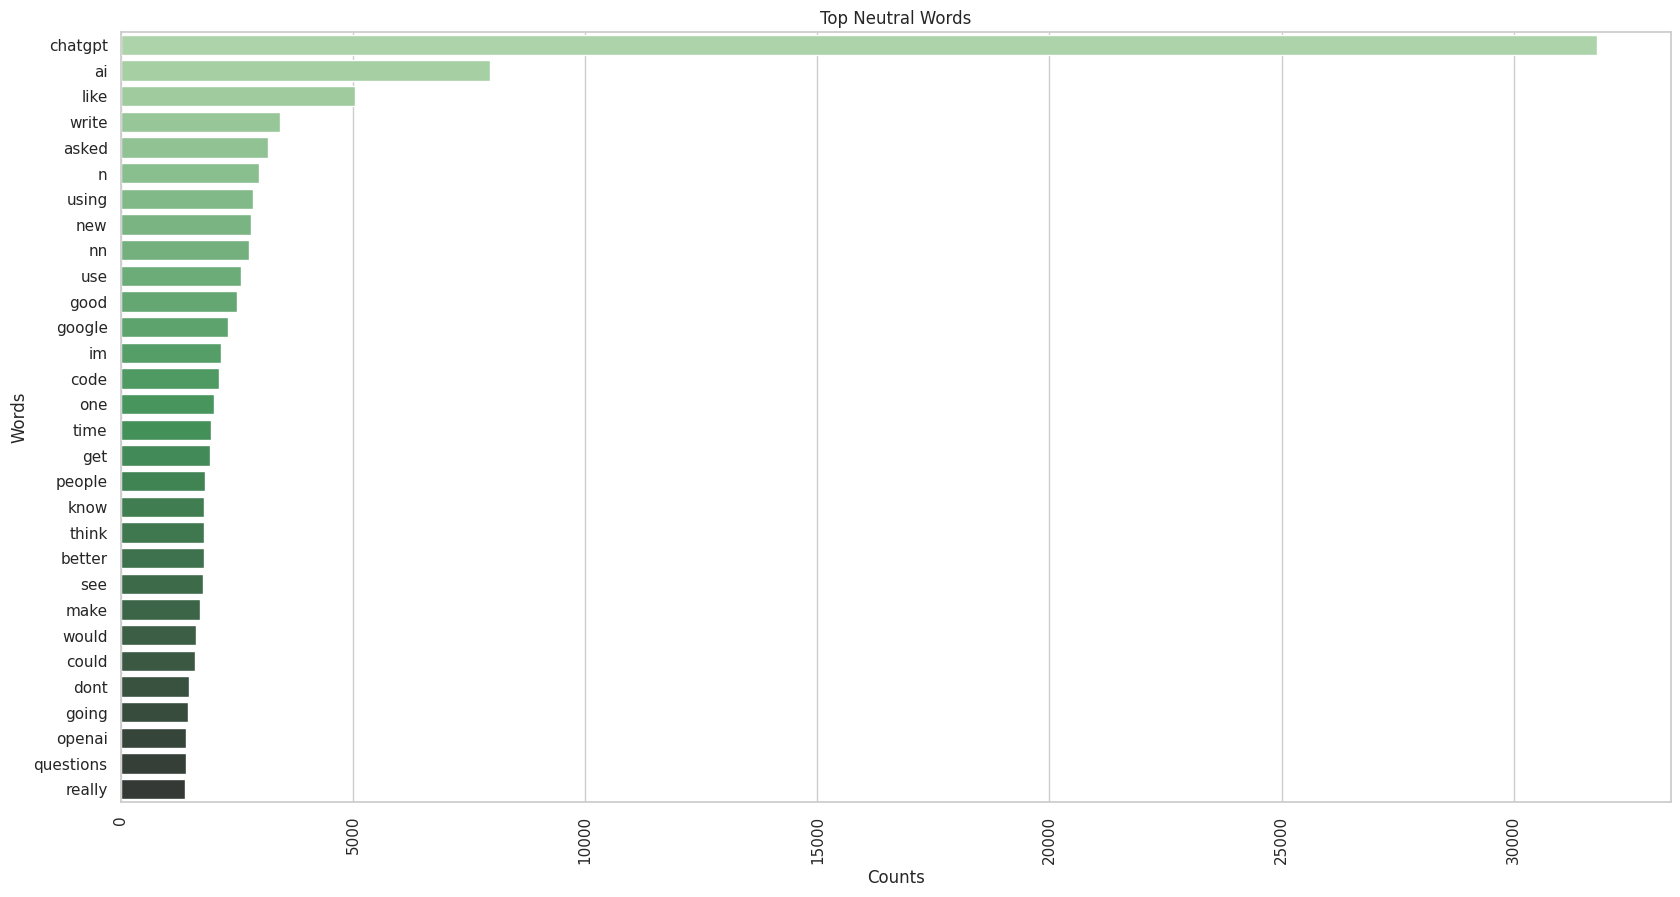

In [30]:
plot_bar(neutral_tweets_words, "Top Neutral Words", colors[2])

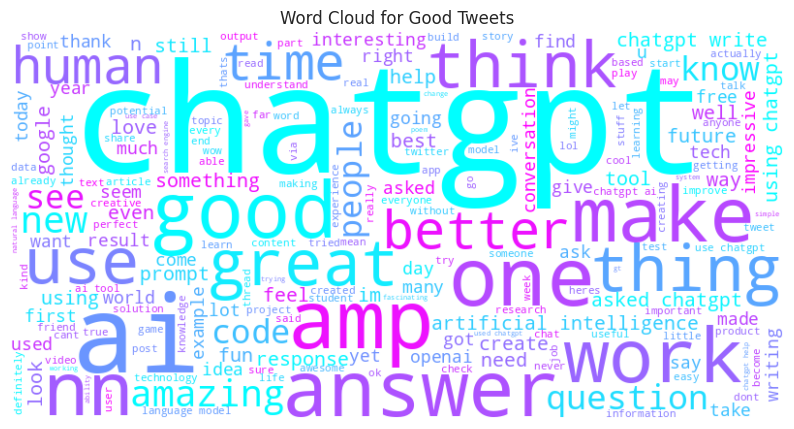

In [31]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Combine all the words into a single string
text = ' '.join(good_tweets_words)
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='cool',).generate(text)
# Displaying word cloud using Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Good Tweets")
plt.show()

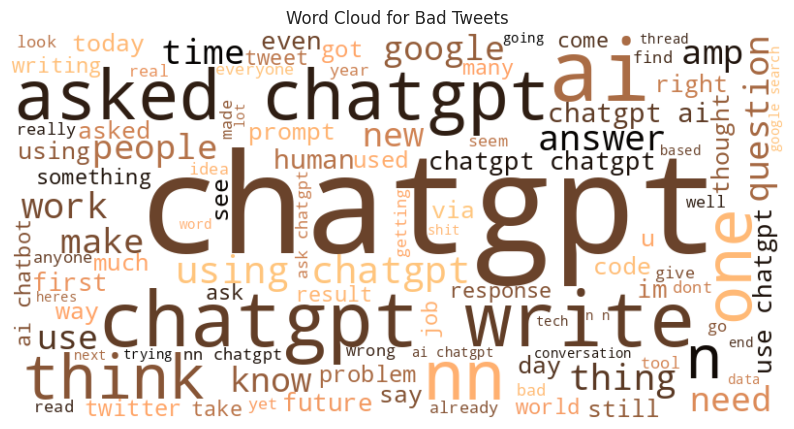

In [32]:
text = ' '.join(bad_tweets_words)
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='copper',
    max_words=100,
    contour_color='black',
    contour_width=1,).generate(text)
# Displaying word cloud using Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Bad Tweets")
plt.show()

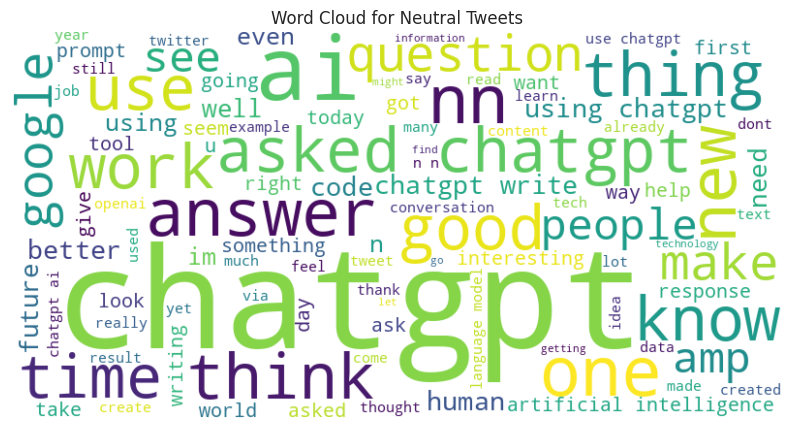

In [33]:
text = ' '.join(neutral_tweets_words)
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=100,
    contour_color='black',
    contour_width=1,).generate(text)
# Displaying word cloud using Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Neutral Tweets")
plt.show()

In [34]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_data, test_data = train_test_split(df[df['labels'] != 'neutral'], test_size=0.2)
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))
acc_metrics = []

encoder = LabelEncoder()
y_train = encoder.fit_transform(train_data['labels'])
y_test = encoder.transform(test_data['labels'])

tokenizer = Tokenizer(num_words=4500)
tokenizer.fit_on_texts(train_data['changed_text'])

X_train = tokenizer.texts_to_sequences(train_data['changed_text'])
X_test = tokenizer.texts_to_sequences(test_data['changed_text'])

max_sequence_length = 600
X_train = pad_sequences(X_train, maxlen=max_sequence_length)
X_test = pad_sequences(X_test, maxlen=max_sequence_length)


X_train = np.where(X_train <= 10000, X_train, 0)
X_test = np.where(X_test <= 10000, X_test, 0)


model = Sequential()
model.add(Embedding(input_dim=10001, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm_model = model.fit(X_train[:10000], y_train[:10000], epochs=6, batch_size=120)

loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)


Train Data size: 114099
Test Data size 28525
Epoch 1/6
84/84 [==============================] - 457s 5s/step - loss: 0.5009 - accuracy: 0.7495
Epoch 2/6
84/84 [==============================] - 451s 5s/step - loss: 0.1946 - accuracy: 0.9304
Epoch 3/6
84/84 [==============================] - 454s 5s/step - loss: 0.1154 - accuracy: 0.9637
Epoch 4/6
84/84 [==============================] - 456s 5s/step - loss: 0.0841 - accuracy: 0.9741
Epoch 5/6
84/84 [==============================] - 456s 5s/step - loss: 0.0635 - accuracy: 0.9814
Epoch 6/6
892/892 [==============================] - 231s 259ms/step - loss: 0.3776 - accuracy: 0.9005
Loss: 0.37764987349510193
Accuracy: 0.9005083441734314


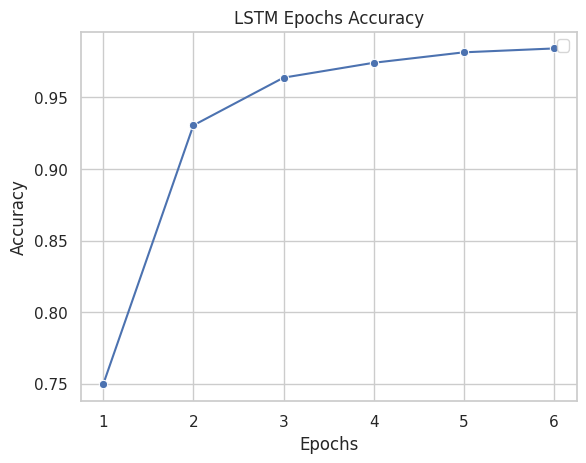

In [35]:
epochs = range(1, len(lstm_model.history['accuracy']) + 1)
accuracy_values = lstm_model.history['accuracy']

sns.lineplot(x=epochs, y=accuracy_values, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('LSTM Epochs Accuracy')

plt.show()



In [36]:
print("Implementation of Bidirectional LSTM")
model_bidirectionallstm = Sequential()
model_bidirectionallstm.add(Embedding(input_dim=10001, output_dim=128, input_length=max_sequence_length))
model_bidirectionallstm.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
model_bidirectionallstm.add(Dense(1, activation='sigmoid'))

model_bidirectionallstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

bidirectionallstm_model = model_bidirectionallstm.fit(X_train[:10000], y_train[:10000], epochs=6, batch_size=120)

# Evaluate Bidirectional LSTM model
loss, accuracy = model_bidirectionallstm.evaluate(X_test, y_test)
print("Bidirectional LSTM - Loss:", loss)
print("Bidirectional LSTM - Accuracy:", accuracy)

Implementation of Bidirectional LSTM
Epoch 1/6
84/84 [==============================] - 905s 11s/step - loss: 0.5176 - accuracy: 0.7419
Epoch 2/6
84/84 [==============================] - 888s 11s/step - loss: 0.2128 - accuracy: 0.9229
Epoch 3/6
84/84 [==============================] - 883s 11s/step - loss: 0.1204 - accuracy: 0.9595
Epoch 4/6
84/84 [==============================] - 887s 11s/step - loss: 0.0888 - accuracy: 0.9727
Epoch 5/6
84/84 [==============================] - 877s 10s/step - loss: 0.0675 - accuracy: 0.9798
Epoch 6/6
892/892 [==============================] - 431s 483ms/step - loss: 0.3861 - accuracy: 0.9026
Bidirectional LSTM - Loss: 0.3860650956630707
Bidirectional LSTM - Accuracy: 0.9026467800140381


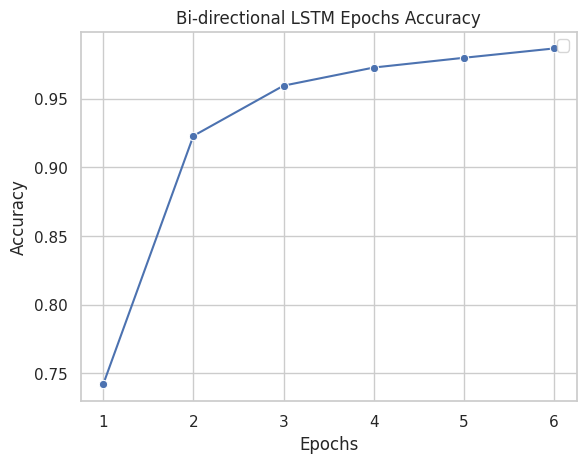

In [37]:
epochs = range(1, len(bidirectionallstm_model.history['accuracy']) + 1)
accuracy_values = bidirectionallstm_model.history['accuracy']

sns.lineplot(x=epochs, y=accuracy_values, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Bi-directional LSTM Epochs Accuracy')

plt.show()



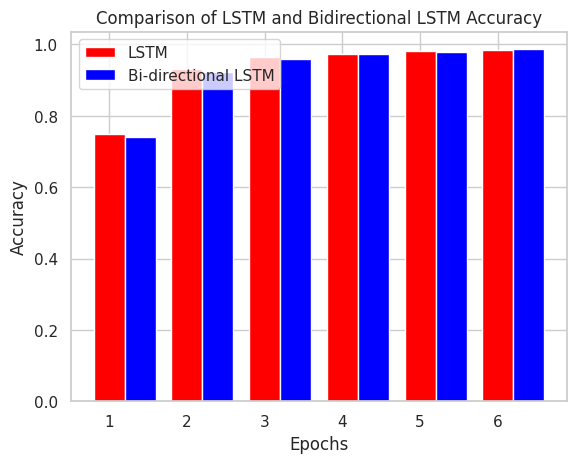

In [38]:
epochs = range(1, 7)

plt.bar(epochs, lstm_model.history['accuracy'], width=0.4, label='LSTM', color='red')
plt.bar([epoch + 0.4 for epoch in epochs], bidirectionallstm_model.history['accuracy'], width=0.4, label='Bi-directional LSTM', color='blue')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Comparison of LSTM and Bidirectional LSTM Accuracy')
plt.legend()
plt.show()


329/329 [==============================] - 94s 284ms/step


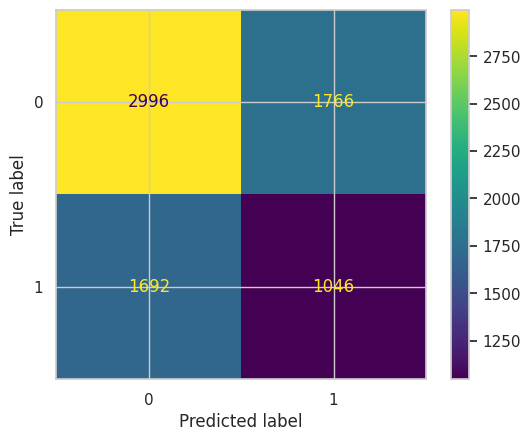

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
test_predictions_lstm = model.predict(X_test[1500:12000])

confusion_matrix_lstm = confusion_matrix(
    list(y_test[3000:10500].reshape(-1)[:7500]),
    [1 if val >= 0.5 else 0 for val in test_predictions_lstm.reshape(-1)[:7500]]
)

cm_display_lstm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_lstm, display_labels=[0, 1])

cm_display_lstm.plot()

def predict_sentiment_lstm(text):
    text_seq_lstm = tokenizer.texts_to_sequences([text])
    text_pad_lstm = pad_sequences(text_seq_lstm, maxlen=max_sequence_length)
    predicted_sentiment_lstm = np.round(model.predict(text_pad_lstm), 2)
    result_dict_lstm = {}

    if predicted_sentiment_lstm <= 0.5:
        result_dict_lstm["LSTM"] = 'Positive'
    else:
        result_dict_lstm["LSTM"] = 'Negative'

    return result_dict_lstm

In [ ]:
print(predict_sentiment_lstm([input('Enter text = ')]))

Enter text = good response
1/1 [==============================] - 0s 67ms/step
{'LSTM': 'Positive'}


329/329 [==============================] - 171s 518ms/step


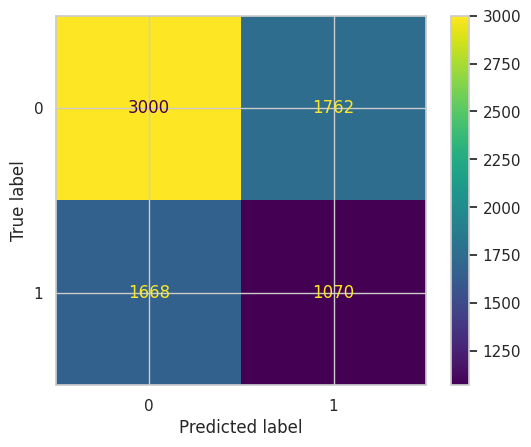

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
test_predictions_bidirectional_lstm = model_bidirectionallstm.predict(X_test[1500:12000])

confusion_matrix_bidirectional_lstm = confusion_matrix(list(y_test[3000:10500].reshape(-1)[:7500]), [1 if val >= 0.5 else 0 for val in test_predictions_bidirectional_lstm.reshape(-1)[:7500]])

cm_display_bidirectional_lstm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_bidirectional_lstm, display_labels=[0, 1])

cm_display_bidirectional_lstm.plot()

def predict_sentiment_bidirectional_lstm(text):
    text_seq_bidirectional_lstm = tokenizer.texts_to_sequences([text])
    text_pad_bidirectional_lstm = pad_sequences(text_seq_bidirectional_lstm, maxlen=max_sequence_length)
    predicted_sentiment_bidirectional_lstm = np.round(model.predict(text_pad_bidirectional_lstm), 2)
    result_dict_bidirectional_lstm = {}

    if predicted_sentiment_bidirectional_lstm <= 0.5:
        result_dict_bidirectional_lstm["LSTM"] = 'Positive'
    else:
        result_dict_bidirectional_lstm["LSTM"] = 'Negative'

    return result_dict_bidirectional_lstm

In [ ]:
print(predict_sentiment_bidirectional_lstm([input('Enter text = ')]))

Enter text = good response
1/1 [==============================] - 0s 59ms/step
{'LSTM': 'Positive'}


In [30]:
!pip install sacremoses

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, Dataset
from transformers import XLMTokenizer, XLMForSequenceClassification
from sklearn.metrics import classification_report, accuracy_score
import torch
import torch.nn as nn
from torch.optim import AdamW

df = df[df['labels'] != 'neutral'].head(1500)

train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

print("Train Data size:", len(train_data))
print("Test Data size:", len(test_data))

encoder = LabelEncoder()
y_train = encoder.fit_transform(train_data['labels'])
y_test = encoder.transform(test_data['labels'])

tokenizer = XLMTokenizer.from_pretrained("xlm-mlm-tlm-xnli15-1024")
model = XLMForSequenceClassification.from_pretrained("xlm-mlm-tlm-xnli15-1024")

class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(self.texts[idx], truncation=True, padding='max_length', max_length=128, return_tensors='pt')
        input_ids = encoding['input_ids'].squeeze()
        attention_mask = encoding['attention_mask'].squeeze()
        label = torch.tensor(self.labels[idx])
        return {'input_ids': input_ids, 'attention_mask': attention_mask, 'labels': label}

train_dataset = CustomDataset(train_data['changed_text'].tolist(), y_train, tokenizer)
test_dataset = CustomDataset(test_data['changed_text'].tolist(), y_test, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

model = XLMForSequenceClassification.from_pretrained('xlm-mlm-tlm-xnli15-1024', num_labels=2)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=1e-4)

epochs = 1
for epoch in range(epochs):
    model.train()
    total_loss = 0
    total_batches = len(train_loader)
    for batch_idx, batch in enumerate(train_loader):
        inputs = {
            'input_ids': batch['input_ids'].to(model.device),
            'attention_mask': batch['attention_mask'].to(model.device),
            'labels': batch['labels'].to(model.device)
        }

        outputs = model(**inputs)
        loss = criterion(outputs.logits, inputs['labels'])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        if (batch_idx + 1) % 10 == 0 or (batch_idx + 1) == total_batches:
            print(f"Epoch [{epoch + 1}/{epochs}], Batch [{batch_idx + 1}/{total_batches}], Loss: {loss.item()}")

    average_loss = total_loss / total_batches
    print(f"Epoch [{epoch + 1}/{epochs}], Average Loss: {average_loss}")

    model.eval()
    labels_model = []
    predictions_model = []

    with torch.no_grad():
        for batch in test_loader:
            inputs = {
                'input_ids': batch['input_ids'].to(model.device),
                'attention_mask': batch['attention_mask'].to(model.device),
                'labels': batch['labels'].to(model.device)
            }

            outputs = model(**inputs)
            logits = outputs.logits
            predictions = torch.argmax(outputs.logits, dim=1)

            labels_model.extend(inputs['labels'].cpu().numpy())
            predictions_model.extend(predictions.cpu().numpy())

    accuracy = accuracy_score(labels_model, predictions_model)
    print(f"Epoch {epoch + 1}, Test Accuracy: {accuracy}")

avg_accuracy = accuracy_score(labels_model, predictions_model)
print(f"Average Accuracy: {avg_accuracy}")

Train Data size: 1200
Test Data size: 300


Some weights of XLMForSequenceClassification were not initialized from the model checkpoint at xlm-mlm-tlm-xnli15-1024 and are newly initialized: ['sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of XLMForSequenceClassification were not initialized from the model checkpoint at xlm-mlm-tlm-xnli15-1024 and are newly initialized: ['sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch [1/1], Batch [10/150], Loss: 4.4242262840271
Epoch [1/1], Batch [20/150], Loss: 5.334802627563477
Epoch [1/1], Batch [30/150], Loss: 2.701096296310425
Epoch [1/1], Batch [40/150], Loss: 2.766908645629883
Epoch [1/1], Batch [50/150], Loss: 0.971190869808197
Epoch [1/1], Batch [60/150], Loss: 2.741057872772217
Epoch [1/1], Batch [70/150], Loss: 2.6713333129882812
Epoch [1/1], Batch [80/150], Loss: 1.9298876523971558
Epoch [1/1], Batch [90/150], Loss: 0.9346725344657898
Epoch [1/1], Batch [100/150], Loss: 0.6514037847518921
Epoch [1/1], Batch [110/150], Loss: 3.2282111644744873
Epoch [1/1], Batch [120/150], Loss: 0.9222490191459656
Epoch [1/1], Batch [130/150], Loss: 2.019963026046753
Epoch [1/1], Batch [140/150], Loss: 3.8832321166992188
Epoch [1/1], Batch [150/150], Loss: 0.6422964334487915
Epoch [1/1], Average Loss: 2.327041352490584
Epoch 1, Test Accuracy: 0.6166666666666667
Average Accuracy: 0.6166666666666667
